In [13]:
#Imports libraries for data manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Load dataset and print first 5 rows

df = pd.read_csv('Mall_Customers(in).csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [15]:
# Displays information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# Data Summary Statistics

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
# Checking for missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Conclusion**

They are no missing value in the dataset

In [18]:
# Gender distribution (count of each unique value)

df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [19]:
# Drop the 'CustomerID' column as it is not needed for clustering

df.drop('CustomerID', axis=1, inplace=True)

In [20]:
# Data Summary Statistics after dropping 'CustomerID'

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


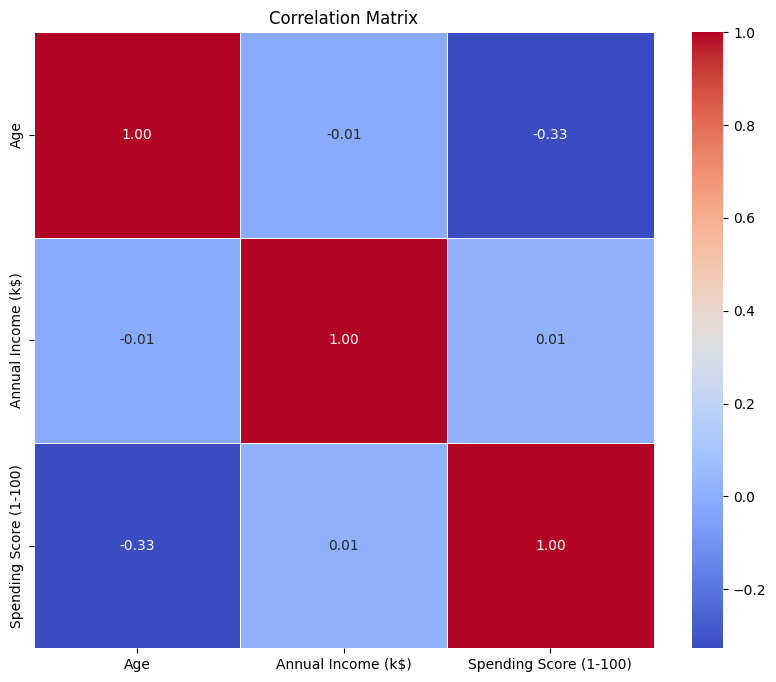

In [21]:
#correlation between Age, Income and Spending Score

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [22]:
#perform One Hot Encoding on categorical column(Gender), dropping the first category to avoid multicollinearity

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['Gender']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))
df_encoded = pd.concat([df.drop('Gender', axis=1), encoded_df], axis=1)
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


In [23]:
# Define feature matrix X and target variable y, variable y is the inert variable here
X = df_encoded

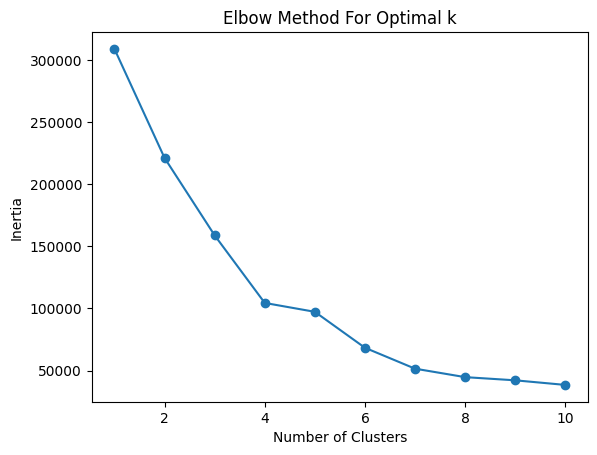

In [24]:
# Elbow Method to determine the optimal number of clusters using range 1-10

inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

##### **Conclusion from the above Visualisation**

For the plot above, the optimal number of clusters is 4, but because we only have 4 features and number of features can't be equal to or less than number of clusters. we will work with 3 clusters.

In [25]:
# fitting the model of 3 clusters with selected features Age, Annual Income and Spending Score 

X_sub = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_sub)

# Add cluster labels to the dataframe
X_sub['cluster'] = clusters

X_sub.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,2


In [26]:
# Cluster distribution

X_sub['cluster'].value_counts()

cluster
0    124
1     41
2     35
Name: count, dtype: int64

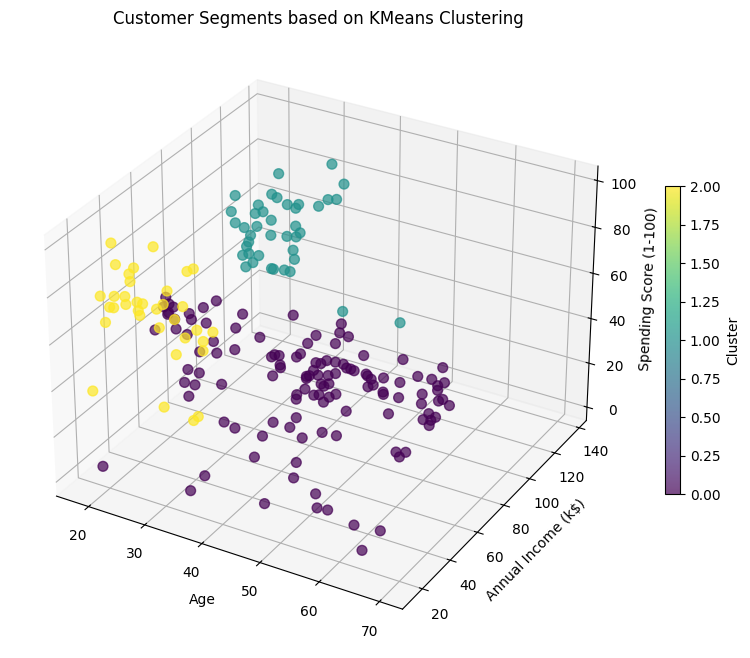

In [27]:
# Create 3D plot for visualizing clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_sub['Age'], X_sub['Annual Income (k$)'], X_sub['Spending Score (1-100)'], 
                    c=X_sub['cluster'], cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments based on KMeans Clustering')

# Add colorbar legend
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20, label='Cluster')

plt.show()

**Inferences and Conclusions from the Cluster Visualisation**

- Customers (Cluster 2) with Low Ages (Between 0 to 30) have an Annual income between 30 to 125 a high Spending score between 0 to 85

- Customers (Cluster 1) with high Annual income (120 to 140) have high Spending Score(20 to 80) and an Age between 0 to 35 with cases of a few Outliers

- Customers (Cluster 0) have an evenly distribution amonge ages and Annual Income but a low spending score between (0 to 60)

In [28]:
# fitting the model of 4 clusters with selected features Age, Annual Income and Spending Score 

X_sub = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_sub)

# Add cluster labels to the dataframe
X_sub['cluster'] = clusters

X_sub.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


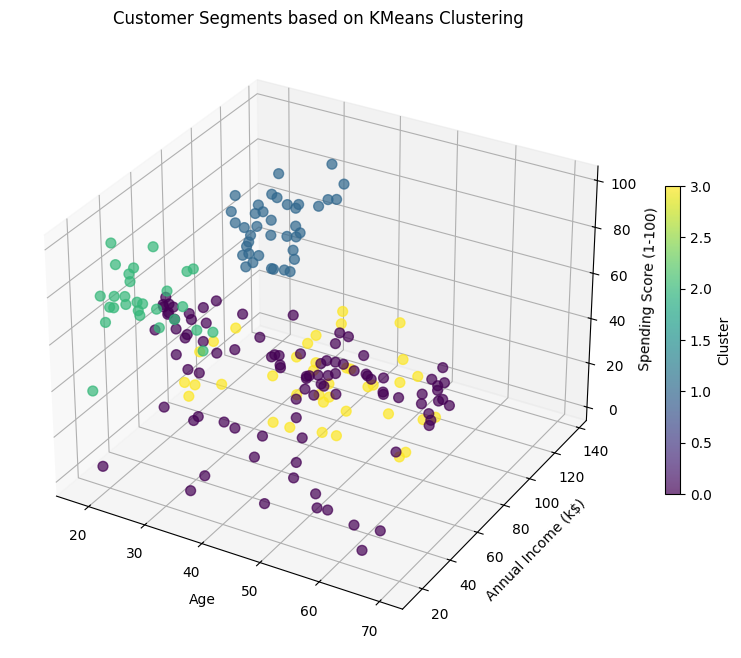

In [29]:
# Create 3D plot for visualizing clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_sub['Age'], X_sub['Annual Income (k$)'], X_sub['Spending Score (1-100)'], 
                    c=X_sub['cluster'], cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments based on KMeans Clustering')

# Add colorbar legend
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20, label='Cluster')

plt.show()

In the diagram above, with the use of 4 clusters, there is not much segmentation between clusters 0 (purple) and 3 (yellow).